In [91]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
from matplotlib import cm
from matplotlib import colors

▪ **Parte 1:**

*(imágenes en /white_patch y /coord_cromaticas)*
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪ **Parte 2:**
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.



# **Parte 1.1**

In [92]:
#Cargar las imagenes:

cc1 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/coord_cromaticas/CoordCrom_1.png')
cc2 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/coord_cromaticas/CoordCrom_2.png')
cc3 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/coord_cromaticas/CoordCrom_3.png')

In [93]:
#Aplicamos el algoritmo de Coordenadas Cromaticas manualmente para liberarnos de las variaciones de contraste
#Primero separamos todos los canales en bgr
b, g, r = cv.split(cc1)

#Transformamos a float para no tener problemas con los numeros decimales
r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

#Aplicamos la ecuacion de coordenadas cromaticas
newR = r / ((g + b + r)+1)
newG = g / ((g + b + r)+1)
newB = b / ((g + b + r)+1)

#Como el resultado de la anterior ecuacion nos deja con valores decimales entre 0 y 1, ahora hacemos que
#este valor de intensidad sea una proporcion de los 255 valores posibles en nuestra imagen.
newR = (newR * 255).astype(np.uint8)
newG = (newG * 255).astype(np.uint8)
newB = (newB * 255).astype(np.uint8)

#Combinamos nuevamente todos los canales para formar la imagen final.
newcc1 = cv.merge((newB,newG,newR))

#Mostramos las dos imagenes en un side-by-side para observar los cambios realizados
concat = np.concatenate((cc1,newcc1), axis=1)
cv2_imshow(concat)

Output hidden; open in https://colab.research.google.com to view.

Repetimos esto para las otras 2 imagenes.

In [94]:
b, g, r = cv.split(cc2)

r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

newR = r / ((g + b + r)+1)
newG = g / ((g + b + r)+1)
newB = b / ((g + b + r)+1)

newR = (newR * 255).astype(np.uint8)
newG = (newG * 255).astype(np.uint8)
newB = (newB * 255).astype(np.uint8)

newcc2 = cv.merge((newB,newG,newR))

concat = np.concatenate((cc2,newcc2), axis=1)
cv2_imshow(concat)

Output hidden; open in https://colab.research.google.com to view.

In [95]:
b, g, r = cv.split(cc3)

r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

newR = r / ((g + b + r)+1)
newG = g / ((g + b + r)+1)
newB = b / ((g + b + r)+1)

newR = (newR * 255).astype(np.uint8)
newG = (newG * 255).astype(np.uint8)
newB = (newB * 255).astype(np.uint8)

newcc3 = cv.merge((newB,newG,newR))

concat = np.concatenate((cc3,newcc3), axis=1)
cv2_imshow(concat)

Output hidden; open in https://colab.research.google.com to view.

**Conclusion**

La tecnica de pasaje de coordenadas cromatica nos ayuda a unificar de cierta manera las variaciones de iluminacion (a modo de retoque de los valores de contraste) que encontramos en las diferentes imagenes de ejemplo. Vemos que el objeto en las diferentes imagenes esta iluminado en mayor o menor medida en relacion con su fondo, esta diferencia de contraste entre un objeto mas brillante y un fondo mas oscuro hace que los limites sean mas fuertes o mas debiles en las imagenes resultantes.
Ademas podemos notar que obtenemos resultados mas nitidios en las dos imagenes que tienen menor iluminacion general, mientras que en la primera, donde los valores de intensidad son mayores, el contraste se vuelve menos aparente en la imagen de salida.

# **Parte 1.2:**
Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [96]:
#Cargamos las imagenes
ali_b = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/white_patch/wp_blue.jpg')
ali_g = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/white_patch/wp_green.png')
ali_r = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/white_patch/wp_red.png')

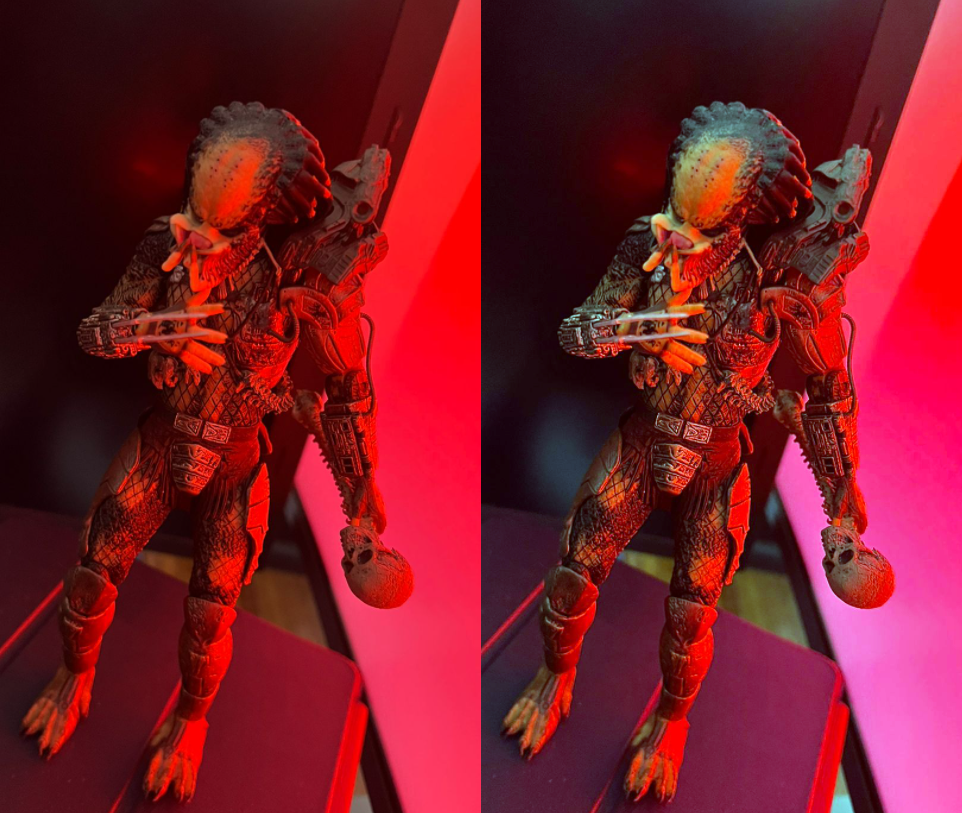

In [97]:
#Aplicamos el algoritmo White Patch
#Primero hacemos la separacion de canales
b, g, r = cv.split(ali_r)

#Convertimos en float para no tener problemas con decimales
r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

#Obtenemos los valores maximos de intensidad de cada canal
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

#Aplicamos la ecuacion de White patch que consiste en multiplicar cada canal por la division entre el maximo valor
# posible de intensidad y el maximo valor en cada canal.

new_r = ((255/max_r)*r).astype(np.uint8)
new_g = ((255/max_g)*g).astype(np.uint8)
new_b = ((255/max_b)*b).astype(np.uint8)

#Unimos todos los canales en una sola imagen
new_ali_r = cv.merge((new_b,new_g,new_r))

#Mostramos el resultado
concat = np.concatenate((ali_r,new_ali_r), axis=1)
cv2_imshow(concat)

Repetimos para todas las imagenes

2.0238095238095237
1.0119047619047619
1.6451612903225807


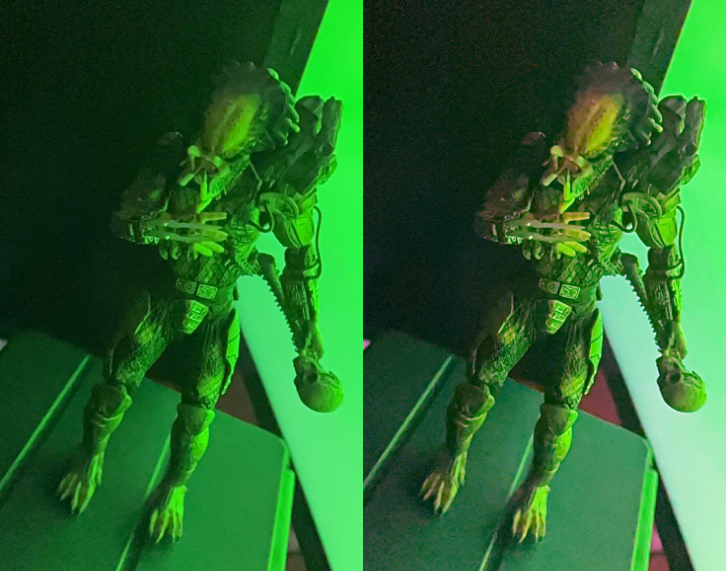

In [98]:
b, g, r = cv.split(ali_g)

r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

new_r = ((255/max_r)*r).astype(np.uint8)
new_g = ((255/max_g)*g).astype(np.uint8)
new_b = ((255/max_b)*b).astype(np.uint8)

print(255/max_r)
print(255/max_g)
print(255/max_b)

new_ali_g = cv.merge((new_b,new_g,new_r))
concat = np.concatenate((ali_g,new_ali_g), axis=1)
cv2_imshow(concat)

In [99]:
b, g, r = cv.split(ali_b)

r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

new_r = ((255/max_r)*r).astype(np.uint8)
new_g = ((255/max_g)*g).astype(np.uint8)
new_b = ((255/max_b)*b).astype(np.uint8)

new_ali_b = cv.merge((new_b,new_g,new_r))
concat = np.concatenate((ali_b,new_ali_b), axis=1)
cv2_imshow(concat)


print('Valor maximo en canar R',max_r)
print('Valor maximo en canar G',max_g)
print('Valor maximo en canar B',max_b)

Valor maximo en canar R 255.0
Valor maximo en canar G 255.0
Valor maximo en canar B 255.0


# **Parte 1.3:**

***Fallas***

Pudimos obtener mejoras en las imagenes de R y G pero en la imagen blue no se pudo mejorar con el algoritmo white patch porque los valores maximos de todos los canales son 255 entonces la division da 1 y no se producen cambios.
Para intentar corregir esto podemos buscar el valor del percentil 95:

In [100]:
b, g, r = cv.split(ali_b)

r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

# Calculamos el percentil 95 para cada canal.
percentil_95_r = np.percentile(r, 95)
percentil_95_g = np.percentile(g, 95)
percentil_95_b = np.percentile(b, 95)

new_r = ((255/percentil_95_r)*r).astype(np.uint8)
new_g = ((255/percentil_95_g)*g).astype(np.uint8)
new_b = ((255/percentil_95_b)*b).astype(np.uint8)

new_ali_b = cv.merge((new_b,new_g,new_r))
concat = np.concatenate((ali_b,new_ali_b), axis=1)
cv2_imshow(concat)



Output hidden; open in https://colab.research.google.com to view.

***Observacion***

No se obtiene una imagen muy buena, ya que satura en muchos lugares.
Tambien se puede realizar el white patch con el valor de la media y obtenemos lo siguiente.

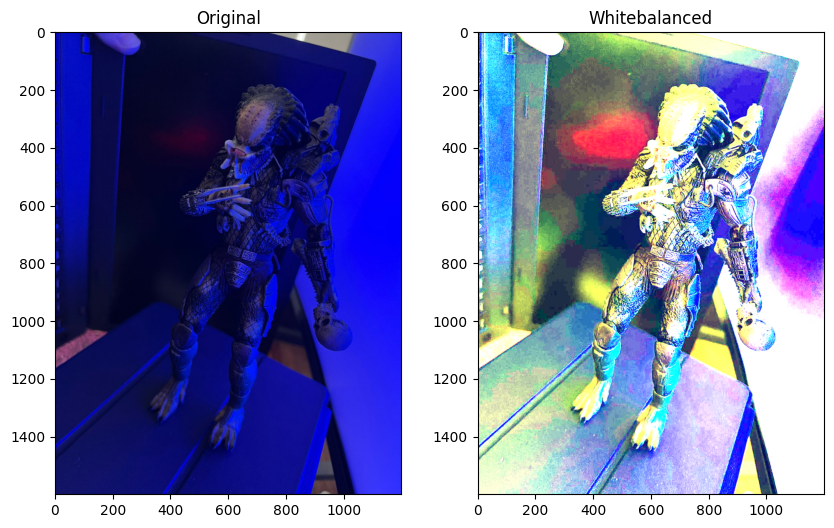

In [101]:
ali_b = cv.cvtColor(ali_b, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(ali_b)
ax[0].set_title('Original')
ali_B = (ali_b*1.0 / ali_b.mean(axis=(0,1)))
ax[1].imshow(ali_B);
ax[1].set_title('Whitebalanced');

***Conclusion***

Esta ultima imagen blue genero muchos problemas a la hora de aplicar el white patch porque teminamos empeorando las relaciones de color e iluminacion. Como conclusion para este caso me atrevo a decir que esto se debe a que la imagen blue ya tenia un white patch aplicado (ya que podemos notar el mismo patron de blancos en la cabeza del alien que notamos en las otras 2 imagenes pasadas por wp).

# **Parte 2.1:**


In [102]:
img1 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/img2_tp.png', cv.IMREAD_GRAYSCALE)

In [103]:
img1.shape

(288, 287)

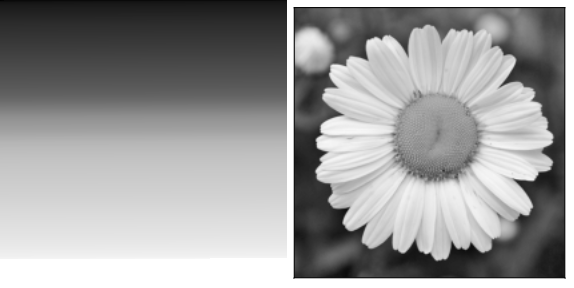

In [104]:
grises = np.concatenate((img1,img2), axis=1)
cv2_imshow(grises)

# **Parte 2.2**

Creamos el histograma de estas dos imagenes.

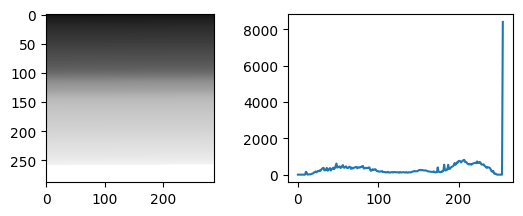

In [105]:
# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1, cmap='gray', vmin=0, vmax=255)

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax3=plt.subplot(222)
ax3.plot(hist1)

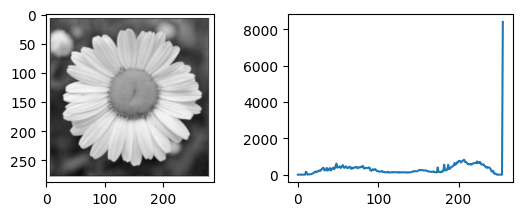

In [106]:
# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img2, cmap='gray', vmin=0, vmax=255)

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax3=plt.subplot(222)
ax3.plot(hist2)


A continuacion utilice otro algoritmo para generar el histograma y asi poder comparar resultados.

Text(0, 0.5, '# pixeles')

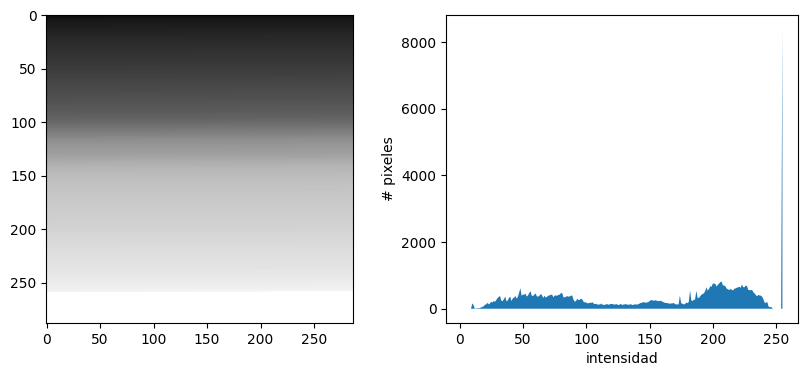

In [107]:
# Importamos la función con un nombre más corto
from skimage.exposure import histogram as imhist
from pylab import *

histo1, bin_centers = imhist(img1) # Obtener histograma y sus bins
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(img1, cmap="gray")

ax_hist.fill_between(bin_centers, histo1)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')


Text(0, 0.5, '# pixeles')

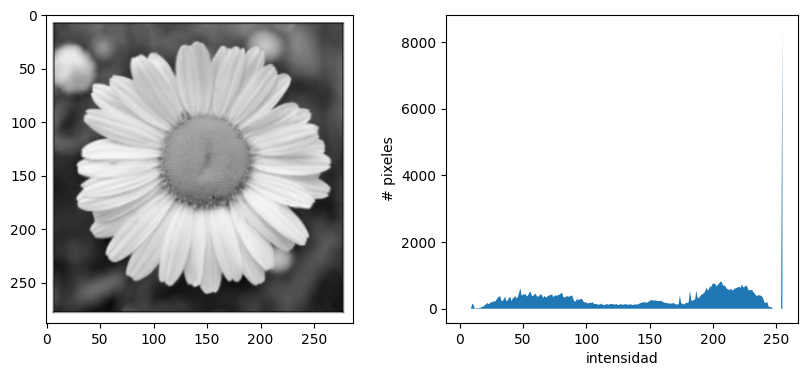

In [108]:
#Ahora para la segunda imagen.

histo2, bin_centers = imhist(img2) # Obtener histograma y sus bins
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(img2, cmap="gray")

ax_hist.fill_between(bin_centers, histo2)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')


# ***Explicacion y Conclusion***
En estas graficas observamos la relacion entre valores de intensidad y la cantidad de pixeles que hay en la imagene con dicho valor de intensidad. Esto es lo que se conoce como Histrograma y es una herramienta importante en el procesamiento de imágenes y la fotografía, ya que proporcionan información valiosa sobre el contraste, la exposición y la calidad de una imagen.
Como obtenemos informacion de el histograma:

***Contraste:*** Un histograma bien distribuido con píxeles en todo el rango de intensidades indica un buen contraste en la imagen. Por otro lado, un histograma que se agrupa en un extremo o en el otro sugiere una imagen con bajo contraste. Si la imagen fuese una de muy alto contraste (solo blanco 255 y negro 0) esto se veria en el histograma como dos puntas en cada valor.

***Exposición:***
Un histograma que se encuentra desplazado hacia la izquierda puede indicar una imagen subexpuesta (demasiado oscura), mientras que un histograma desplazado hacia la derecha puede sugerir una imagen sobreexpuesta (demasiado clara).

***Distribución de color:***
En una imagen en color, se pueden examinar los histogramas de los canales RGB para evaluar la distribución de colores en la imagen y ajustar el equilibrio de blancos si es necesario.
Para entrenar un modelo de deteccion de imagenes el histograma no va a servir de mucho ya que en este no hay datos de la posicion relativa de los pixeles y 2 imagenes totalmente diferentes pueden tener histogramas muy similares, como es el caso que vimos anteriormente.


***Entrenamiento de modelos:***
Para entrenar un modelo de deteccion de imagenes el histograma no va a servir de mucho ya que en este no hay datos de la posicion relativa de los pixeles y 2 imagenes totalmente diferentes pueden tener histogramas muy similares, como se da en el caso que estuvimos analizando.

A continuacion se hace la diferencia entre ambos histogramas y se puede ver que el resultado es una imagen en blanco.
Basandome en este resultado tengo como hipotesis que la imagen degrade es una representacion de los valores de los pixeles en la imagen de la flor.

Text(0.5, 1.0, 'Subtraction Result')

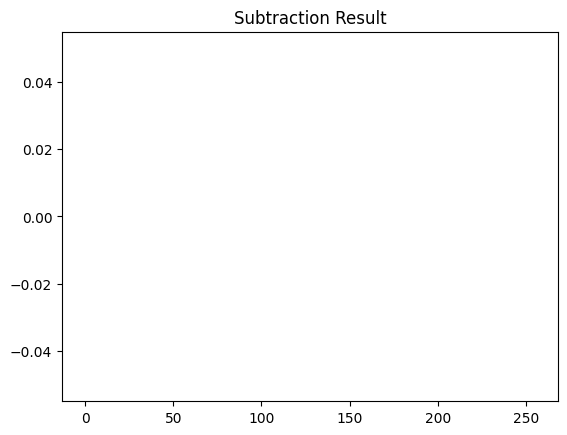

In [109]:
diff = hist1 - hist2
plt.subplot()
plt.bar(range(len(diff)), diff, color='green', alpha=0.6, label='Subtraction Result')
plt.title('Subtraction Result')


# **Parte 2.3**

Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

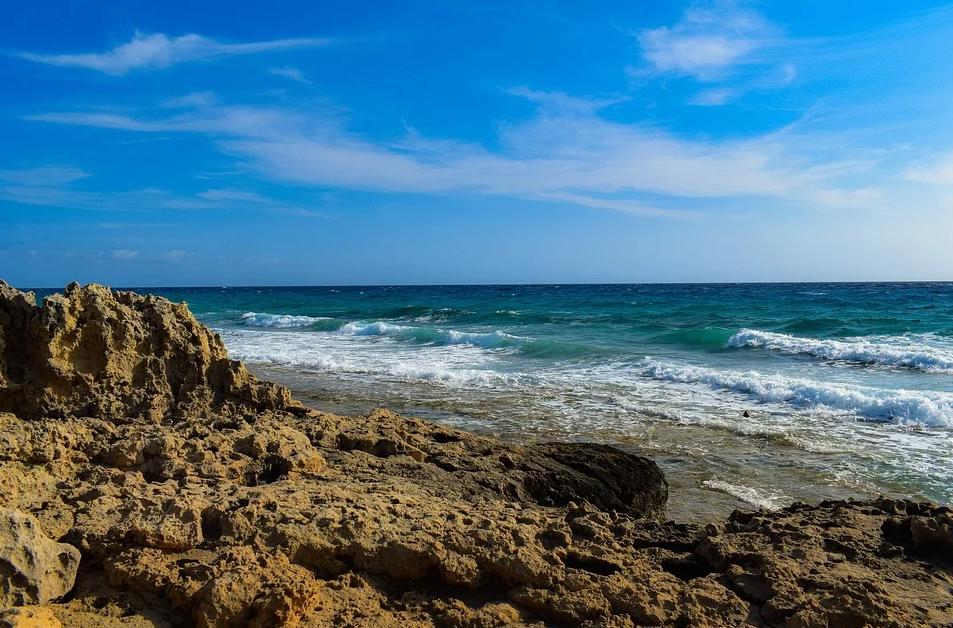

In [110]:
#Cargamos la imagen.
imgRGB = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP1/Materiales/segmentacion.png')
cv2_imshow(imgRGB)

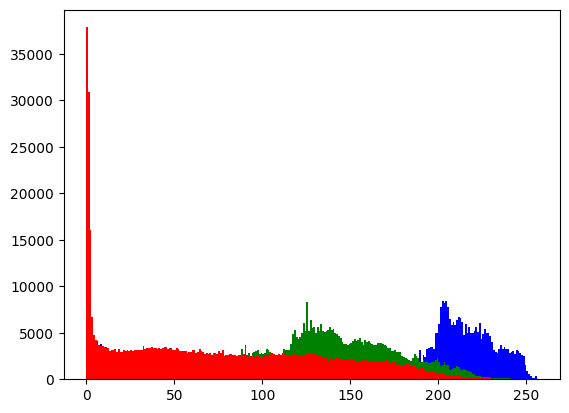

In [111]:
b, g, r = cv.split(imgRGB)
plt.hist(b.ravel(),256,[0,256],color='blue')
plt.hist(g.ravel(),256,[0,256],color='green')
plt.hist(r.ravel(),256,[0,256],color='red')
plt.show()

Vamos a segmentar el oceano y el cielo.

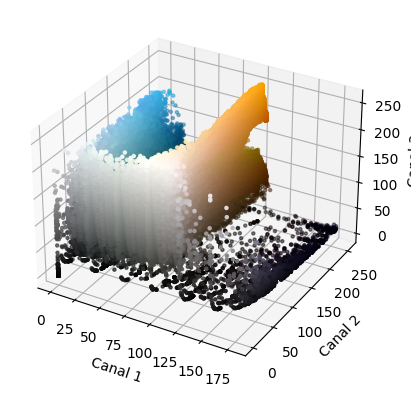

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(imgRGB, cv.COLOR_BGR2HSV)

#c1, c2, c3 = cv.split(imgRGB)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

A continuacion vamos a tratar de segmentar cielo, agua y tierra. Utilizaremos tanto RGB como HSV para comparar los resultados obtenidos y elegir los mejores resultados

**AGUA**

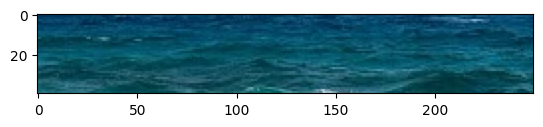

In [113]:
#Realizamos una muestra del oceano
imgRGB = cv.cvtColor(imgRGB, cv.COLOR_BGR2RGB)
muestra_oceano = imgRGB[290:330,600:850,:]
plt.figure(2)
plt.imshow(muestra_oceano)
plt.show()

In [114]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón amarillo en el espacio RGB
ocean_color_mean, ocean_color_std = cv.meanStdDev(muestra_oceano)
print(ocean_color_mean.flatten().tolist())
print(ocean_color_std.flatten().tolist())

[12.7149, 80.69210000000001, 101.929]
[14.952792982917941, 17.043858060603498, 17.345834053166808]


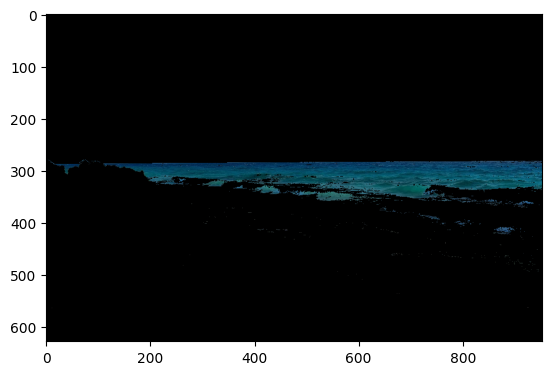

<function matplotlib.pyplot.show(close=None, block=None)>

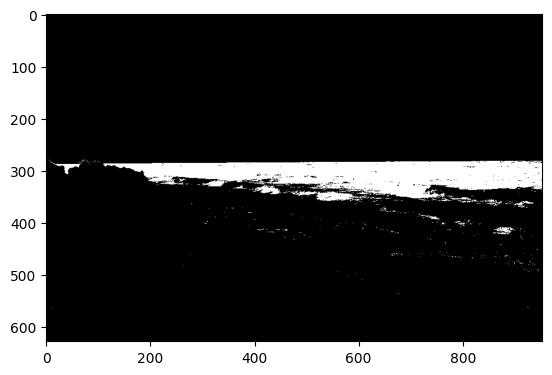

In [115]:
n_sigma = 3
mask = cv.inRange(imgRGB, ocean_color_mean - ocean_color_std * n_sigma,  ocean_color_mean + ocean_color_std * n_sigma)
oceano_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(oceano_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

(22.9996, 226.47240000000002, 101.9293, 0.0)


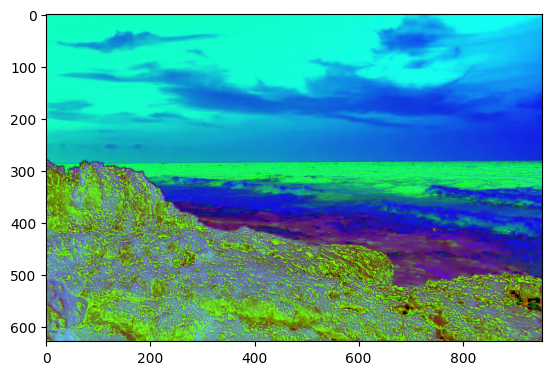

In [135]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv.cvtColor(imgRGB, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

img_muestra_hsv = img_HSV[290:330,600:850,:]

color_mean = cv.mean(img_muestra_hsv)

print(color_mean)

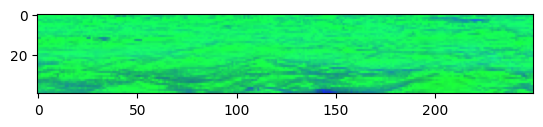

In [136]:
plt.imshow(img_muestra_hsv)

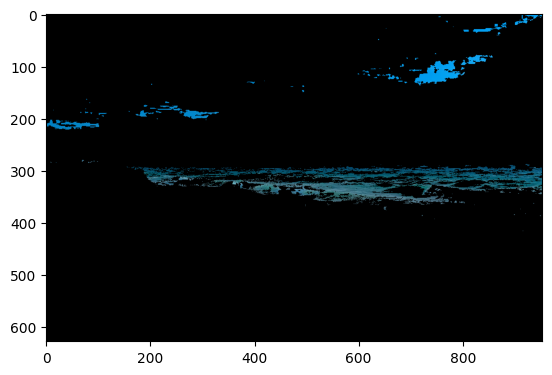

<function matplotlib.pyplot.show(close=None, block=None)>

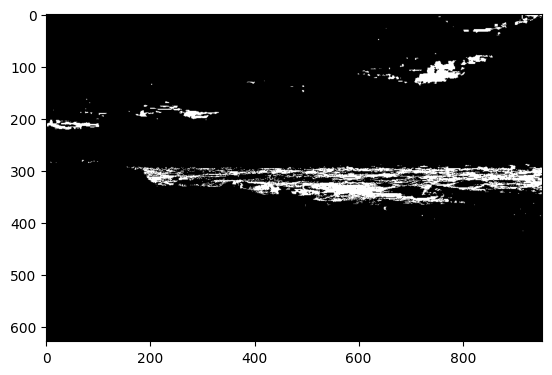

In [141]:
color_l = (20,100,100)
color_u = (30,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show

Al segmentar el agua notamos que obtenemos mejores resultados con el metodo RGB, el cual logra realizar un corte casi perfecto entre el cielo y el agua.
Pero en las zonas de las olas ninguno de los dos modelos puede segmentar correctamente ya que los pixeles de color blanco quedan muy lejos de los intervalos seleccionados de color a segmentar.

**CIELO**

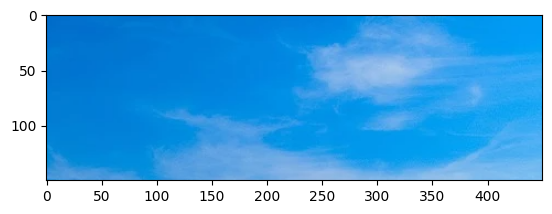

Media: [33.67431111111111, 148.6184, 227.49471111111112]
Desviacion estandar [42.18714110834962, 19.71815510384423, 11.448754169238425]


In [119]:
#Muestra del cielo
muestra_cielo = imgRGB[0:150,400:850,:]
cielo_color_mean, cielo_color_std = cv.meanStdDev(muestra_cielo)

plt.figure(2)
plt.imshow(muestra_cielo)
plt.show()

print('Media:',cielo_color_mean.flatten().tolist())
print('Desviacion estandar',cielo_color_std.flatten().tolist())

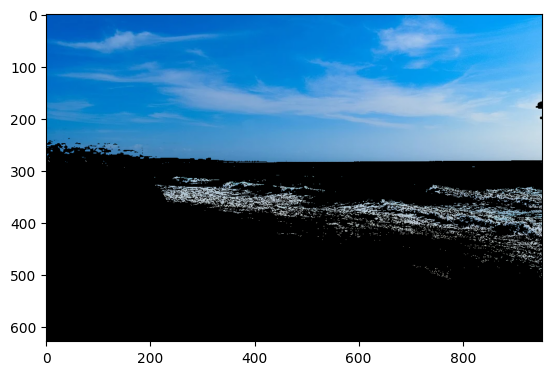

<function matplotlib.pyplot.show(close=None, block=None)>

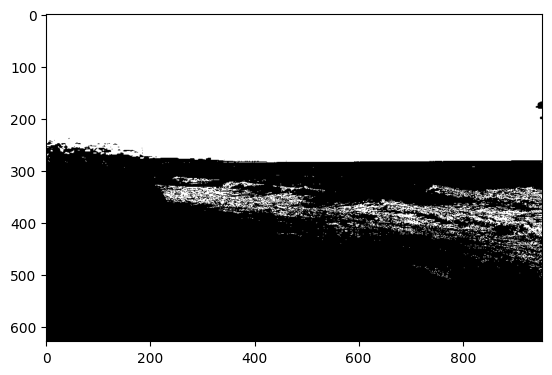

In [120]:
n_sigma = 4
mask = cv.inRange(imgRGB, cielo_color_mean - cielo_color_std * n_sigma,  cielo_color_mean + cielo_color_std * n_sigma)
cielo_segmentado = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(cielo_segmentado)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

In [121]:
img_muestra_hsv = img_HSV[0:150,400:600,:]

color_mean = cv.mean(img_muestra_hsv)

print(color_mean)

(17.418033333333334, 237.2412666666667, 216.99223333333333, 0.0)


In [122]:
plt.imshow(img_muestra_hsv)

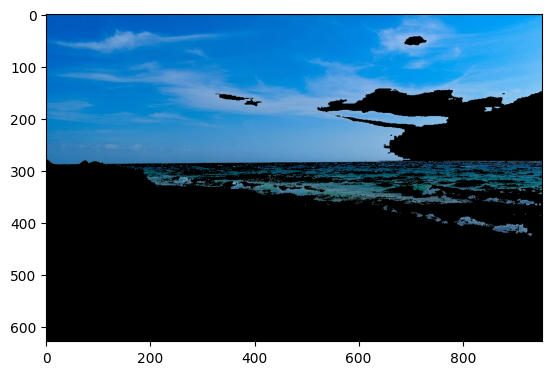

<function matplotlib.pyplot.show(close=None, block=None)>

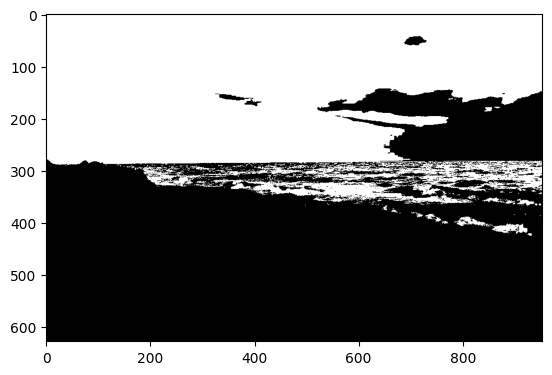

In [143]:
color_l = (0,100,100)
color_u = (40,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show

En este caso, si bien el metodo con RGB parece admitir un area mucho mayor del agua que lo que admite el HSV, podemos decir que el primero hace un seccionamiento mejor que el segundo. El metodo que utiliza HSV nos da un resultado que se atiene mas al color predominante del cielo y segmenta tambien las nubes por esta razon.

**TIERRA**

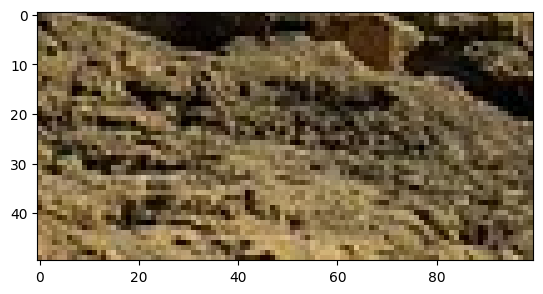

Media: [105.91640000000001, 88.13680000000001, 58.8156]
Desviacion estandar [49.201132212988746, 45.47426179455802, 36.648825310506204]


In [124]:
#Muestra de la tierra
muestra_tierra = imgRGB[450:500,350:450,:]
tierra_color_mean, tierra_color_std = cv.meanStdDev(muestra_tierra)

plt.figure(2)
plt.imshow(muestra_tierra)
plt.show()

print('Media:',tierra_color_mean.flatten().tolist())
print('Desviacion estandar',tierra_color_std.flatten().tolist())

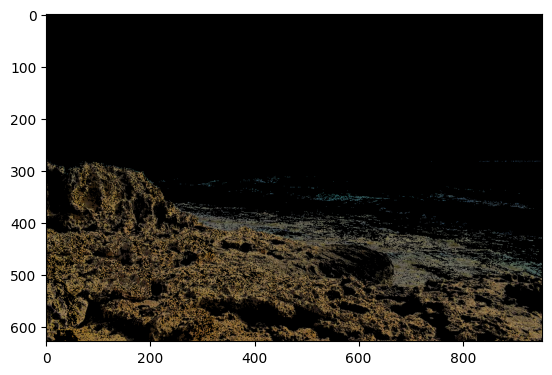

<function matplotlib.pyplot.show(close=None, block=None)>

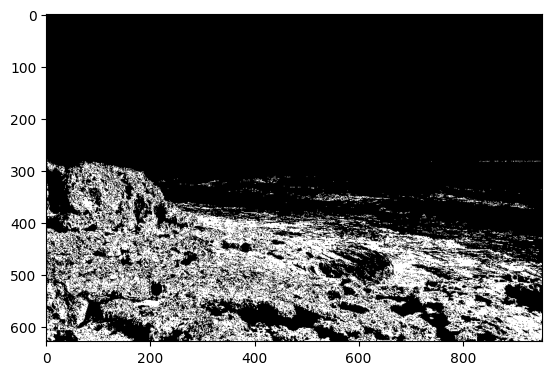

In [125]:
n_sigma = 1.3
mask = cv.inRange(imgRGB, tierra_color_mean - tierra_color_std * n_sigma,  tierra_color_mean + tierra_color_std * n_sigma)
tierra_segmentado = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(tierra_segmentado)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

In [126]:
img_muestra_hsv = img_HSV[450:500,350:450,:]

color_mean = cv.mean(img_muestra_hsv)

print(color_mean)

(101.5878, 130.3828, 105.9362, 0.0)


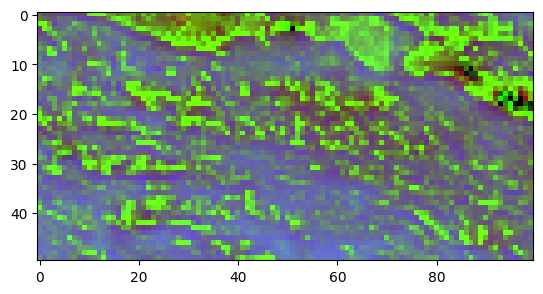

In [127]:
plt.imshow(img_muestra_hsv)

<function matplotlib.pyplot.show(close=None, block=None)>

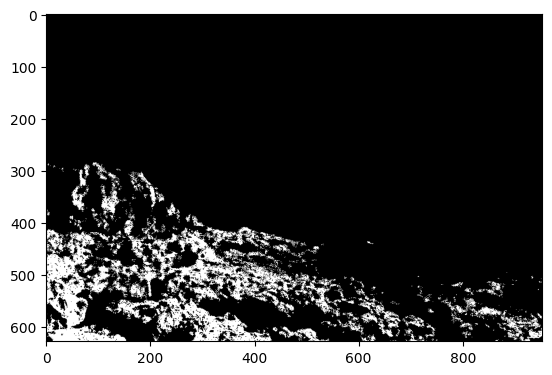

In [132]:
color_l = (80,100,100)
color_u = (120,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show

Este ultimo segmentado por ambos metodos podemos notar que con HSV obtenemos un corte muy bueno respecto a donde se encuentran los bordes de la zona rocosa, sin embargo al haber muchas zonas negras todas ellas quedan fuera de la mascara de segmentacion. Por el lado del metodo con RGB obtenemos una mascara que cubre un mayor rango de colores y nos segmenta hasta un poco de la playa, lo que sigue siendo correcto.